# Problem definition
Walmart uses both art and science to continually make progress on their core mission of better understanding and serving their customers. One way Walmart is able to improve customers' shopping experiences is by segmenting their store visits into different trip types. 
Customer.
Whether they're on a last minute run for new puppy supplies or leisurely making their way through a weekly grocery list, classifying trip types enables Walmart to create the best shopping experience for every customer.

Currently, Walmart's trip types are created from a combination of existing customer insights ("art") and purchase history data ("science"). In their third recruiting competition, Walmart is challenging Kagglers to focus on the (data) science and classify customer trips using only a transactional dataset of the items they've purchased. Improving the science behind trip type classification will help Walmart refine their segmentation process.

Walmart is hosting this competition to connect with data scientists who break the mold.


# Creation of base dataset

#### Create data set for walmart trip type

In [169]:
import pandas as pd
import numpy as np
base_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\walmart_DataSet\\train.csv")

In [170]:
base_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [171]:
base_dataset.shape

(647054, 7)

In [172]:
base_dataset=base_dataset[0:1000]

In [173]:
base_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [174]:
backup_dataset=base_dataset

# Pre Processing

## Memory management 

In [175]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
df=base_dataset
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    
base_dataset=df

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.02 MB
Decreased by 71.2%


In [176]:
base_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053881e+10,1,SHOES,8928.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3564.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


## Null value treatement

In [177]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    # null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    # null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    #if any variable as null value greater than input(like 30% of the data) 
    #value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [178]:
base_dataset,cat,cont=null_values(base_dataset)

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      4
ScanCount                0
DepartmentDescription    4
FinelineNumber           4
dtype: int64
30
30
TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64


## Outlier treatment 

In [179]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y

In [180]:
outliers_transform(base_dataset)

In [181]:
base_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,36.0,5,Friday,7.001198e+09,1.0,FINANCIAL SERVICES,1000.0
1,30.0,7,Friday,7.001198e+09,1.0,SHOES,8928.0
2,30.0,7,Friday,7.410811e+09,1.0,PERSONAL CARE,4504.0
3,26.0,8,Friday,2.238404e+09,1.0,PAINT AND ACCESSORIES,3564.0
4,26.0,8,Friday,2.006614e+09,1.0,PAINT AND ACCESSORIES,1017.0


In [182]:
cat

['Weekday', 'DepartmentDescription']

In [183]:
base_dataset_1=base_dataset

In [184]:
backup_dataset_1=base_dataset

## Dummy variables

In [185]:
# dummy_columns=[]
# for i in base_dataset_1.columns:
#     if(base_dataset_1[i].nunique()>=3) & (base_dataset_1[i].nunique()<5):
#         print(i)

In [186]:
base_dataset_1[cat].head()

,Weekday,DepartmentDescription
0,Friday,FINANCIAL SERVICES
1,Friday,SHOES
2,Friday,PERSONAL CARE
3,Friday,PAINT AND ACCESSORIES
4,Friday,PAINT AND ACCESSORIES


In [187]:
dummies_tables=pd.get_dummies(base_dataset_1[cat])

In [188]:
dummies_tables.head()

,Weekday_Friday,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_PRE PACKED DELI,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
## Merging dummy dataframe to the base_dataset_1
for i in dummies_tables:
    base_dataset_1[i]=dummies_tables[i]

In [192]:
base_dataset_1.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Friday,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_PRE PACKED DELI,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,36.0,5,Friday,7.001198e+09,1.0,FINANCIAL SERVICES,1000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,7,Friday,7.001198e+09,1.0,SHOES,8928.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,30.0,7,Friday,7.410811e+09,1.0,PERSONAL CARE,4504.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,8,Friday,2.238404e+09,1.0,PAINT AND ACCESSORIES,3564.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,8,Friday,2.006614e+09,1.0,PAINT AND ACCESSORIES,1017.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
## Delete cat columns because we converted cat columns to dummy columns
base_dataset_1 = base_dataset_1.drop(cat,axis=1)

In [194]:
base_dataset_1.head()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_PRE PACKED DELI,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,36.0,5,7.001198e+09,1.0,1000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,7,7.001198e+09,1.0,8928.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,30.0,7,7.410811e+09,1.0,4504.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,8,2.238404e+09,1.0,3564.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,8,2.006614e+09,1.0,1017.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [196]:
cont

Index(['TripType', 'VisitNumber', 'Upc', 'ScanCount', 'FinelineNumber'], dtype='object')

In [197]:
for i in cont:
    if i != 'TripType':
        sd = StandardScaler()
        sd.fit(pd.DataFrame(base_dataset_1[i]))
        z = sd.transform(pd.DataFrame(base_dataset_1[i]))
        base_dataset_1[i] = z

In [198]:
base_dataset_1.head()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_PRE PACKED DELI,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,36.0,-1.732400,0.582232,0.0,-0.876766,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,-1.716763,0.582232,0.0,1.870120,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,30.0,-1.716763,0.726752,0.0,0.337296,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,-1.708944,-1.098186,0.0,0.011606,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,-1.708944,-1.179967,0.0,-0.870876,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Univariate analysis (EDA)

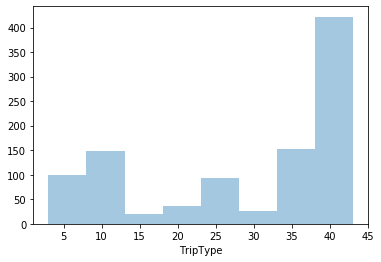

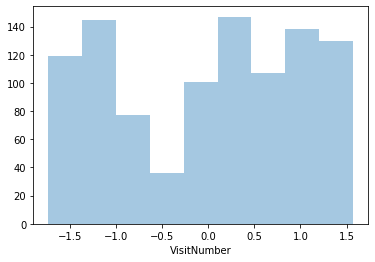

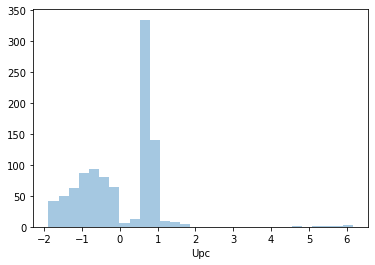

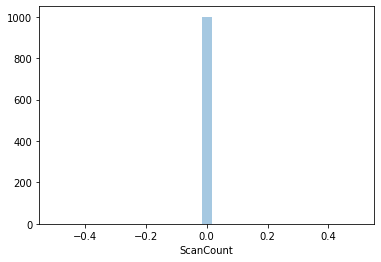

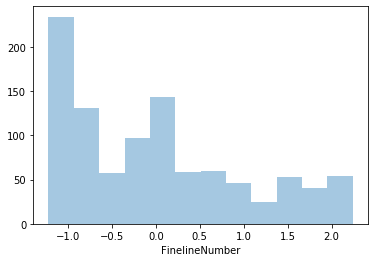

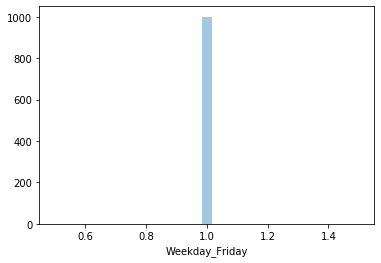

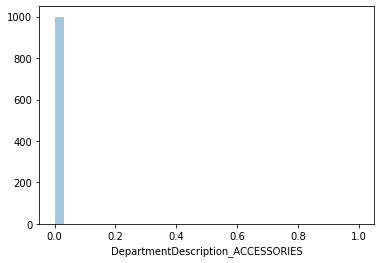

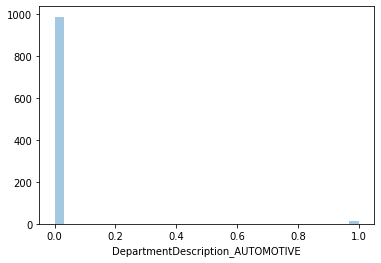

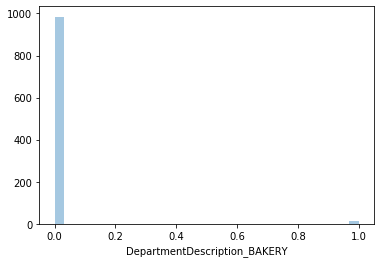

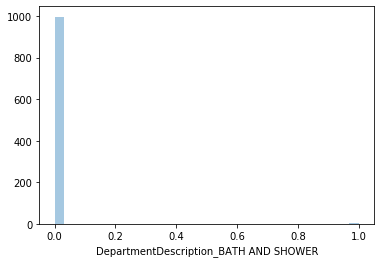

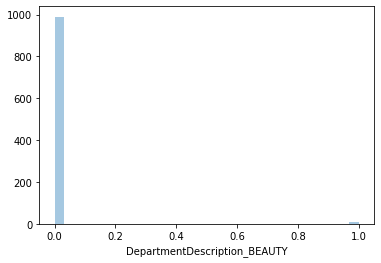

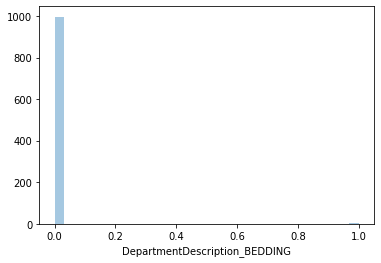

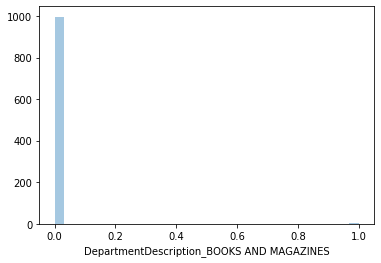

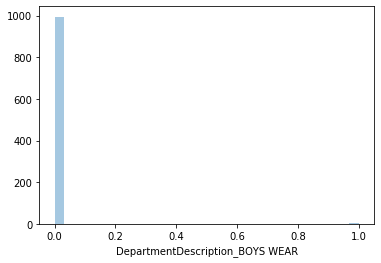

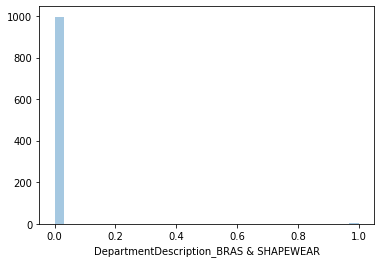

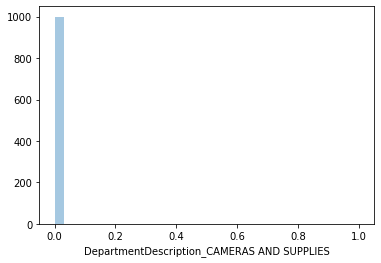

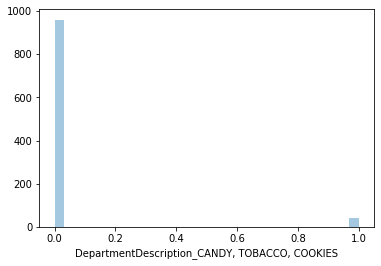

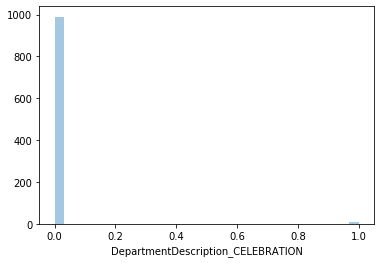

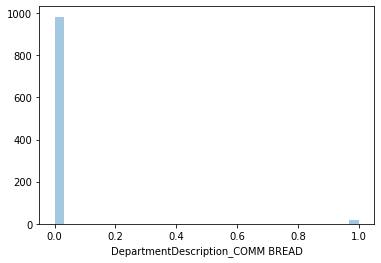

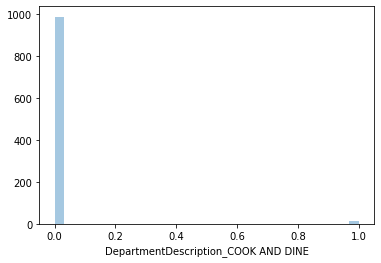

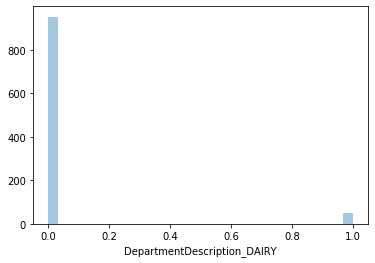

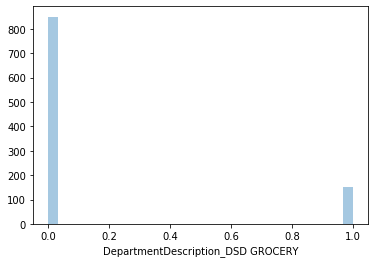

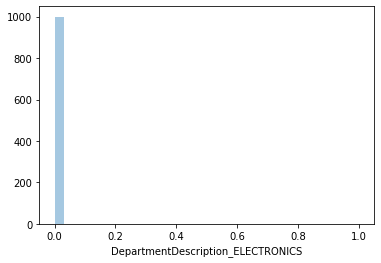

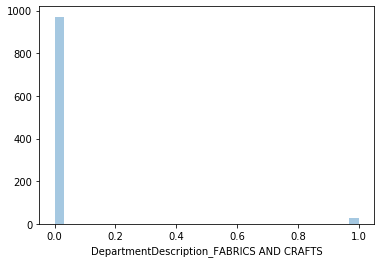

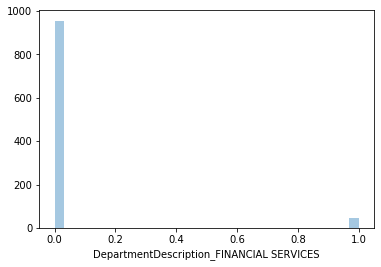

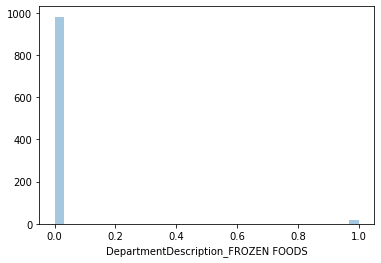

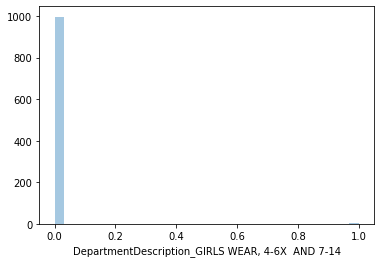

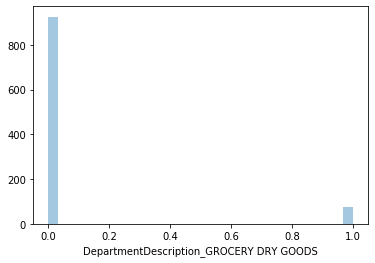

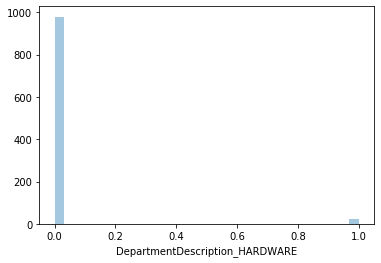

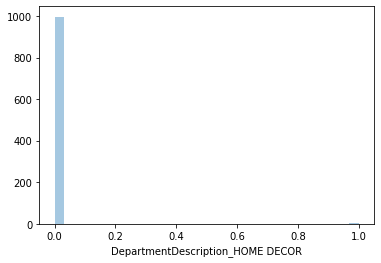

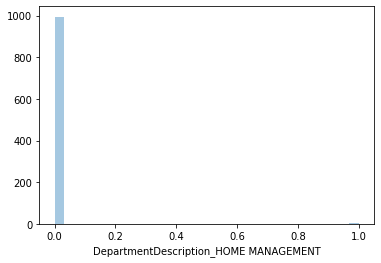

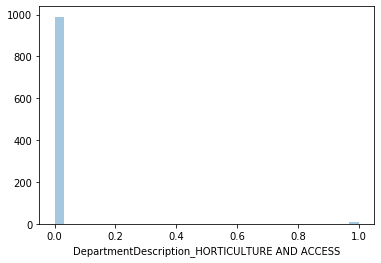

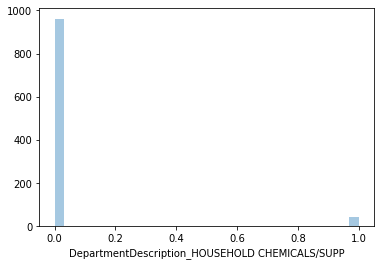

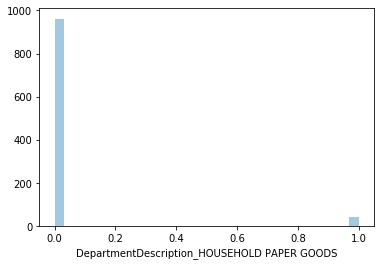

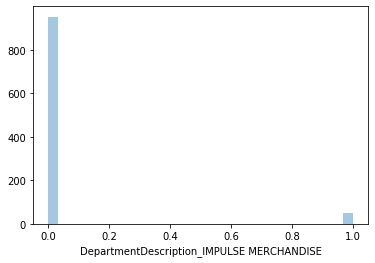

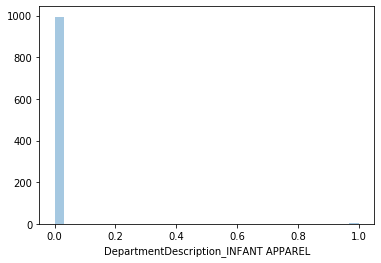

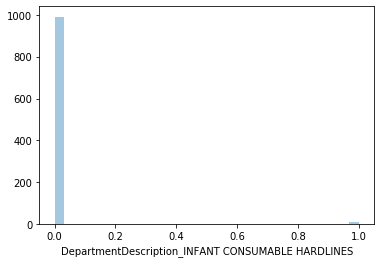

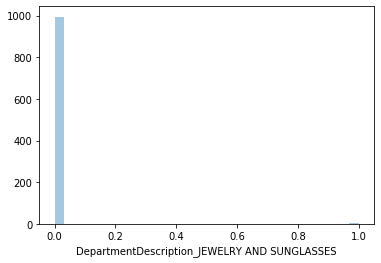

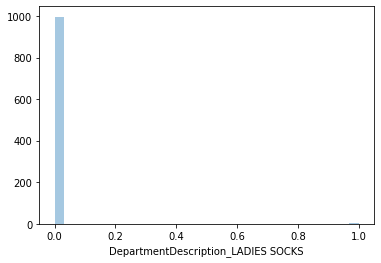

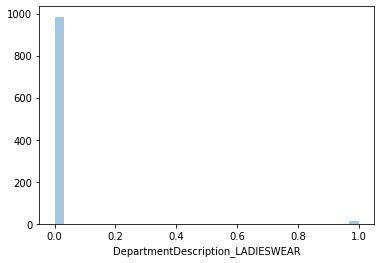

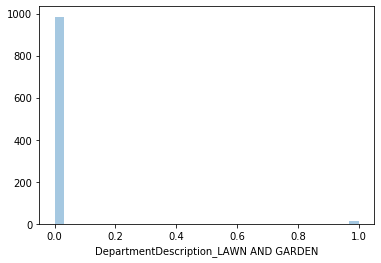

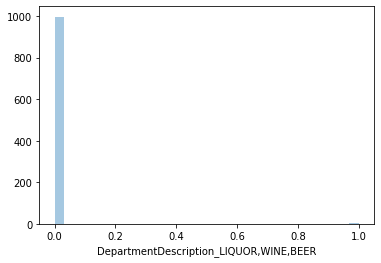

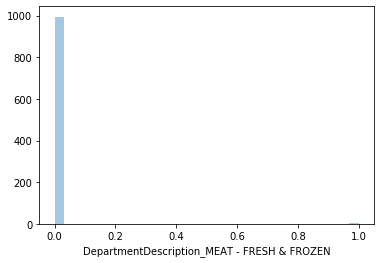

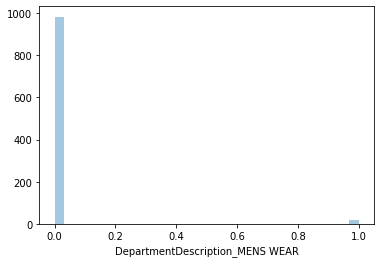

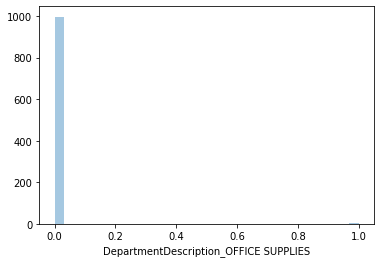

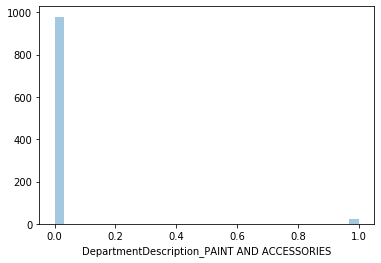

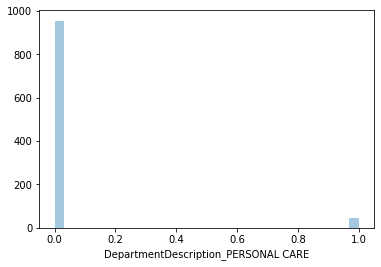

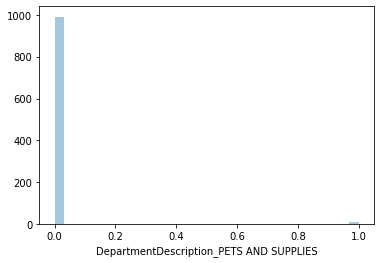

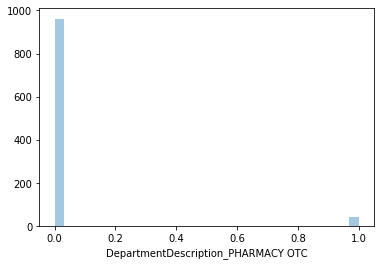

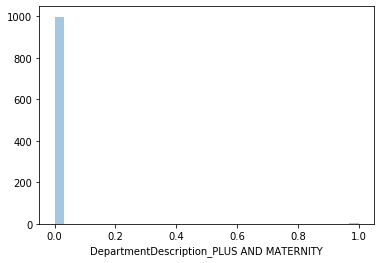

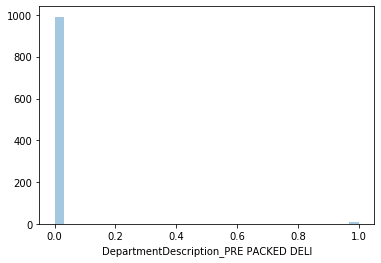

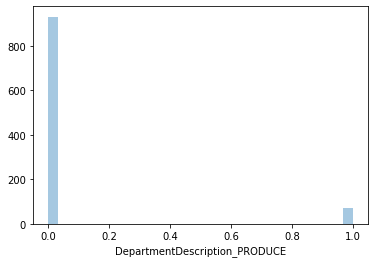

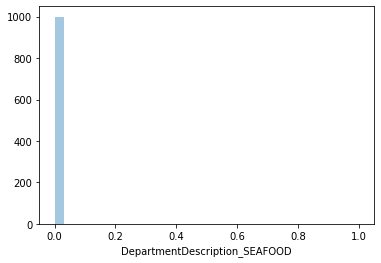

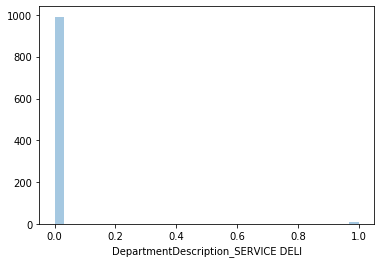

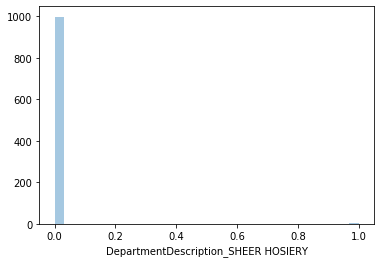

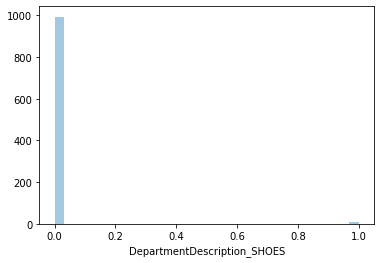

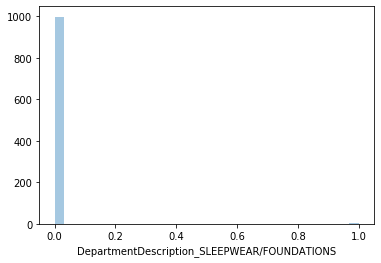

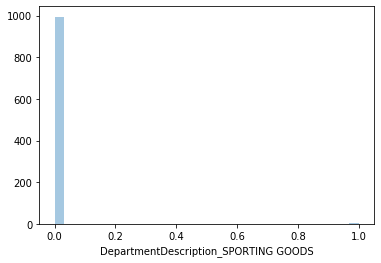

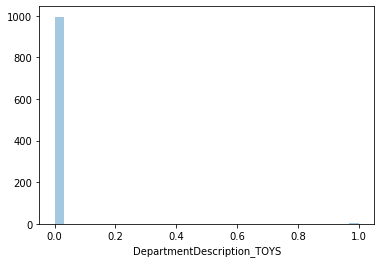

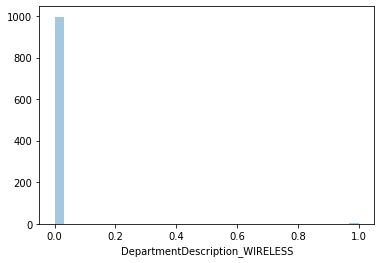

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in base_dataset_1.var().index:
    sns.distplot(base_dataset_1[i],kde=False)
    plt.show()

## Bivariate analysis (EDA)

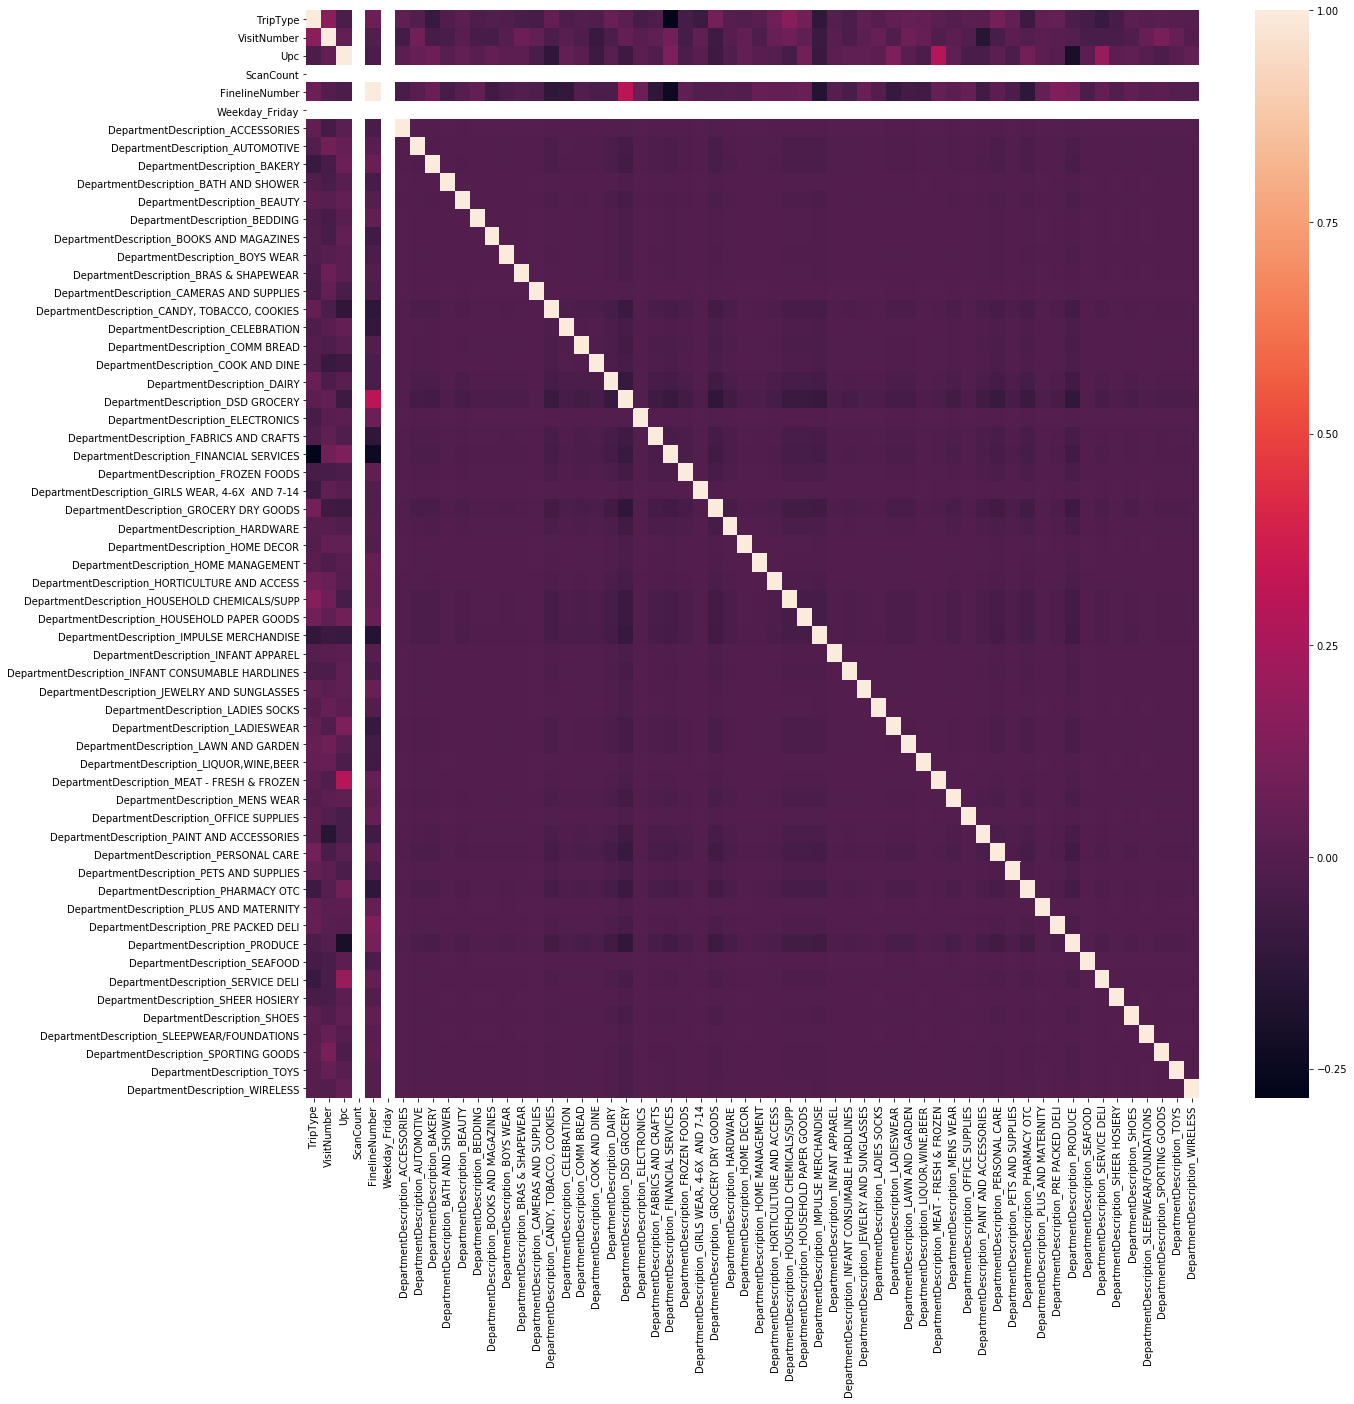

In [204]:
plt.figure(figsize=(20,20))
sns.heatmap(base_dataset_1.corr())

# Model Building

## Supervised

 ### Classification

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [206]:
base_dataset_1['TripType'].nunique()

30

In [207]:
## Dummy variables for the TripType which is a Y variable here.
## The TripType column has 32 trip types. Different types of customer select trip type from 32.
y_variables=pd.get_dummies(base_dataset_1['TripType'])

In [208]:
y_variables.head()

,3.0,4.0,5.0,6.0,7.0,8.0,9.0,15.0,18.0,20.0,...,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
# y_variables[0:y_variables.shape[0],0:1]

In [210]:
## Add all columns to X variable expect TripType
x = base_dataset_1.drop('TripType',axis=1)

In [211]:
x.head()

,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,...,DepartmentDescription_PRE PACKED DELI,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,-1.732400,0.582232,0.0,-0.876766,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.716763,0.582232,0.0,1.870120,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.716763,0.726752,0.0,0.337296,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.708944,-1.098186,0.0,0.011606,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.708944,-1.179967,0.0,-0.870876,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [213]:
final_accuracy_scores_for_DecisionTreeClassifier=[]
for j in y_variables.columns:
    X_train,X_test,y_train,y_test=train_test_split(x,y_variables[j],test_size=0.20,random_state=43)
    print("------------------------------------------------------------------------------------")
    print("Following are the results for DecisionTreeClassifier machine learning model")
    print("")
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    dt.predict(X_test)
    dt.predict(X_train)
    print("Confusion matrix for test samples and for the TripType {}".format(j))
    print(confusion_matrix(y_test,dt.predict(X_test)))
    print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_test,dt.predict(X_test))))
    print("Confusion matrix for training samples for the TripType {}".format(j))
    print(confusion_matrix(y_train,dt.predict(X_train)))
    print("Accuracy score for the TripType {}  and for the training data is {}  ".format(j,accuracy_score(y_train,dt.predict(X_train))))
    final_accuracy_scores_for_DecisionTreeClassifier.append([DecisionTreeClassifier(),confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train))])
    print("K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType {} is as follows ".format(j))
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=10))

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 3.0
[[190   0]
 [  0  10]]
Accuracy score for the TripType 3.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 3.0
[[773   0]
 [  0  27]]
Accuracy score for the TripType 3.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 3.0 is as follows 
[1.         0.98765432 1.         1.         0.9875     0.9875
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 4.0
[[197   0]
 [  1   2]]
Accuracy score for the TripType 4.0  and for the test data is 0.995 
Confus

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 0.97530864 1.         0.975      0.9625     0.9875
 0.9625     1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 6.0
[[199   1]
 [  0   0]]
Accuracy score for the TripType 6.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 6.0
[[789   0]
 [  0  11]]
Accuracy score for the TripType 6.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 6.0 is as follows 
[0.98765432 0.975      0.975      0.95       0.9875     0.9875
 0.975      0.9875     0.975      0.98734177]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



[[194   1]
 [  3   2]]
Accuracy score for the TripType 24.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 24.0
[[780   0]
 [  0  20]]
Accuracy score for the TripType 24.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 24.0 is as follows 
[0.975  0.9875 0.9875 1.     0.9625 0.9875 0.9875 1.     0.9875 0.975 ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 25.0
[[195   1]
 [  2   2]]
Accuracy score for the TripType 25.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 25.0
[[777   0]
 [  0  23]]
Accuracy score for the TripType 25.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 25.0 is as f

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         0.98765432 1.         1.         1.
 0.98734177 1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 30.0
[[199   0]
 [  0   1]]
Accuracy score for the TripType 30.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 30.0
[[799   0]
 [  0   1]]
Accuracy score for the TripType 30.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 30.0 is as follows 
[0.98765432 0.9875     1.         1.         1.         1.
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripT

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



Accuracy score for the TripType 32.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 32.0 is as follows 
[0.98765432 0.98765432 0.98765432 0.975      1.         0.975
 1.         0.96202532 0.98734177 1.        ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 33.0
[[193   2]
 [  3   2]]
Accuracy score for the TripType 33.0  and for the test data is 0.975 
Confusion matrix for training samples for the TripType 33.0
[[779   0]
 [  0  21]]
Accuracy score for the TripType 33.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 33.0 is as follows 
[0.96296296 0.975      0.9875     0.95       0.9875     0.9875
 0.9875     0.9875     0.9875     0.97468354]
----------------------

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.92592593 0.975      0.9375     0.95       0.95       0.9875
 0.95       0.975      0.9375     0.88607595]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 37.0
[[189   1]
 [  2   8]]
Accuracy score for the TripType 37.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 37.0
[[776   0]
 [  0  24]]
Accuracy score for the TripType 37.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 37.0 is as follows 
[0.98765432 1.         0.98765432 0.98765432 0.9875     0.975
 0.98734177 0.98734177 1.         0.98734177]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.97530864 0.91358025 0.9625     0.9875     0.9875     0.975
 0.9875     0.95       0.94936709 0.97468354]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model

Confusion matrix for test samples and for the TripType 43.0
[[198   0]
 [  1   1]]
Accuracy score for the TripType 43.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 43.0
[[785   0]
 [  0  15]]
Accuracy score for the TripType 43.0  and for the training data is 1.0  
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 43.0 is as follows 
[0.96296296 0.98765432 0.97530864 0.98765432 1.         0.98734177
 0.97468354 1.         0.98734177 0.98734177]


In [214]:
final_accuracy_scores_for_RandomForestClassifier=[]
for j in y_variables.columns:
    X_train,X_test,y_train,y_test=train_test_split(x,y_variables[j],test_size=0.20,random_state=43)
    print("------------------------------------------------------------------------------------")
    print("Following are the results for RandomForestClassifier() machine learning model")
    print("")
    dt=RandomForestClassifier()
    dt.fit(X_train,y_train)
    dt.predict(X_test)
    dt.predict(X_train)
    print("Confusion matrix for test samples and for the TripType {}".format(j))
    print(confusion_matrix(y_test,dt.predict(X_test)))
    print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_test,dt.predict(X_test))))
    print("Confusion matrix for training samples for the TripType {}".format(j))
    print(confusion_matrix(y_train,dt.predict(X_train)))
    print("Accuracy score for the TripType {}  and for the training data is {}  ".format(j,accuracy_score(y_train,dt.predict(X_train))))
    final_accuracy_scores_for_RandomForestClassifier.append([dt,confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train))])
    print("K-Fold results for machine learning model RandomForestClassifier() and for the TripType {} is as follows ".format(j))
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(dt,X_train,y_train,cv=10))

------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 3.0
[[190   0]
 [  1   9]]
Accuracy score for the TripType 3.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 3.0
[[773   0]
 [  0  27]]
Accuracy score for the TripType 3.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 3.0 is as follows 
[1.         0.98765432 1.         1.         0.9625     1.
 0.9875     1.         1.         0.98734177]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 4.0
[[197   0]
 [  3   0]]
Accuracy score for the TripType 4.0  and for the test data is 0.985 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Confusion matrix for training samples for the TripType 4.0
[[796   0]
 [  0   4]]
Accuracy score for the TripType 4.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 4.0 is as follows 
[0.98765432 0.98765432 0.98765432 0.98765432 1.         1.
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 5.0
[[195   0]
 [  4   1]]
Accuracy score for the TripType 5.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 5.0
[[792   0]
 [  2   6]]
Accuracy score for the TripType 5.0  and for the training data is 0.9975  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 5.0 is as follows 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



[0.98765432 0.98765432 1.         0.9875     0.975      0.9875
 0.9875     0.9875     1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 6.0
[[200]]
Accuracy score for the TripType 6.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 6.0
[[789   0]
 [  1  10]]
Accuracy score for the TripType 6.0  and for the training data is 0.99875  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 6.0 is as follows 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[0.97530864 0.9875     0.975      0.9875     0.9875     0.9875
 0.975      0.9875     0.9875     0.98734177]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 7.0
[[196   0]
 [  2   2]]
Accuracy score for the TripType 7.0  and for the test data is 0.99 
Confusion matrix for training samples for the TripType 7.0
[[772   0]
 [  3  25]]
Accuracy score for the TripType 7.0  and for the training data is 0.99625  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 7.0 is as follows 
[0.96296296 0.97530864 0.9375     0.975      0.9625     0.9625
 0.9875     0.975      0.97468354 0.97468354]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and 

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.87654321 0.8875     0.9        0.9        0.85       0.9375
 0.8875     0.9        0.9        0.89873418]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 9.0
[[191   2]
 [  4   3]]
Accuracy score for the TripType 9.0  and for the test data is 0.97 
Confusion matrix for training samples for the TripType 9.0
[[761   0]
 [  2  37]]
Accuracy score for the TripType 9.0  and for the training data is 0.9975  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 9.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.9382716  0.95       0.9625     0.9625     0.9625     0.9625
 0.9625     0.9375     0.9125     0.98734177]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 15.0
[[195   0]
 [  2   3]]
Accuracy score for the TripType 15.0  and for the test data is 0.99 
Confusion matrix for training samples for the TripType 15.0
[[786   0]
 [  0  14]]
Accuracy score for the TripType 15.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 15.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.97530864 0.98765432 0.97530864 0.97530864 0.9875     1.
 0.98734177 0.98734177 1.         0.98734177]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 18.0
[[200]]
Accuracy score for the TripType 18.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 18.0
[[796   0]
 [  0   4]]
Accuracy score for the TripType 18.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 18.0 is as follows 
[0.98765432 0.98765432 1.         1.         1.         1.
 1.         1.         1.         1.        ]

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 20.0
[[199   0]
 [  0   1]]
Accuracy score for the TripType 20.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 20.0
[[794   0]
 [  0   6]]
Accuracy score for the TripType 20.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 20.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 1.         0.98765432 1.         0.9875     0.975
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 21.0
[[199   0]
 [  0   1]]
Accuracy score for the TripType 21.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 21.0
[[776   0]
 [  3  21]]
Accuracy score for the TripType 21.0  and for the training data is 0.99625  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 21.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.         0.98765432 0.98765432 0.98765432 1.         0.9875
 1.         1.         1.         0.97468354]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 24.0
[[195   0]
 [  3   2]]
Accuracy score for the TripType 24.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 24.0
[[780   0]
 [  1  19]]
Accuracy score for the TripType 24.0  and for the training data is 0.99875  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 24.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.9875 1.     0.9875 0.9875 0.9875 1.     0.9875 1.     1.     0.975 ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 25.0
[[195   1]
 [  4   0]]
Accuracy score for the TripType 25.0  and for the test data is 0.975 
Confusion matrix for training samples for the TripType 25.0
[[776   1]
 [  3  20]]
Accuracy score for the TripType 25.0  and for the training data is 0.995  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 25.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.96296296 0.96296296 0.96296296 0.975      0.9625     1.
 0.9875     0.97468354 0.97468354 0.96202532]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 26.0
[[194   0]
 [  0   6]]
Accuracy score for the TripType 26.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 26.0
[[775   0]
 [  1  24]]
Accuracy score for the TripType 26.0  and for the training data is 0.99875  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 26.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.97530864 0.96296296 0.98765432 0.98765432 0.98765432 0.97468354
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 27.0
[[197   0]
 [  1   2]]
Accuracy score for the TripType 27.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 27.0
[[792   0]
 [  1   7]]
Accuracy score for the TripType 27.0  and for the training data is 0.99875  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 27.0 is as follows 
[0.98765432 1.         1.         1.         0.9875     0.9875
 0.9875     0.9875     1.         1.        ]

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 29.0
[[200]]
Accuracy score for the TripType 29.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 29.0
[[795   0]
 [  0   5]]
Accuracy score for the TripType 29.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 29.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         0.98765432 1.         1.         1.
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 30.0
[[199   0]
 [  1   0]]
Accuracy score for the TripType 30.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 30.0
[[799   0]
 [  0   1]]
Accuracy score for the TripType 30.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 30.0 is as follows 
[0.98765432 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 31.0
[[199   0]
 [  1   0]]
Accuracy score for the TripType 31.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 31.0
[[798   0]
 [  0   2]]
Accuracy score for the TripType 31.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 31.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 0.98765432 1.         1.         1.         1.
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 32.0
[[196   0]
 [  4   0]]
Accuracy score for the TripType 32.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 32.0
[[787   0]
 [  0  13]]
Accuracy score for the TripType 32.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 32.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.98765432 1.         0.98765432 0.9875     0.9875     0.975
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 33.0
[[195   0]
 [  4   1]]
Accuracy score for the TripType 33.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 33.0
[[779   0]
 [  3  18]]
Accuracy score for the TripType 33.0  and for the training data is 0.99625  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 33.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.98765432 0.9875     0.9625     0.975      1.         0.9875
 0.9875     0.975      0.9875     0.98734177]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 34.0
[[199   0]
 [  1   0]]
Accuracy score for the TripType 34.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 34.0
[[797   0]
 [  0   3]]
Accuracy score for the TripType 34.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 34.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         0.98765432 1.         1.         1.
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 35.0
[[191   0]
 [  6   3]]
Accuracy score for the TripType 35.0  and for the test data is 0.97 
Confusion matrix for training samples for the TripType 35.0
[[764   1]
 [  1  34]]
Accuracy score for the TripType 35.0  and for the training data is 0.9975  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 35.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.95061728 0.9382716  0.9382716  0.95061728 0.9382716  0.96202532
 0.96202532 0.94936709 0.93670886 0.96202532]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 36.0
[[194   0]
 [  4   2]]
Accuracy score for the TripType 36.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 36.0
[[761   0]
 [  5  34]]
Accuracy score for the TripType 36.0  and for the training data is 0.99375  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 36.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.95061728 0.975      0.95       0.95       0.95       0.975
 0.9875     0.975      0.9875     0.96202532]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 37.0
[[188   2]
 [  9   1]]
Accuracy score for the TripType 37.0  and for the test data is 0.945 
Confusion matrix for training samples for the TripType 37.0
[[776   0]
 [  6  18]]
Accuracy score for the TripType 37.0  and for the training data is 0.9925  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 37.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.97530864 0.96296296 0.97530864 0.96296296 0.975      0.9875
 0.97468354 0.97468354 0.98734177 1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 38.0
[[186   2]
 [  5   7]]
Accuracy score for the TripType 38.0  and for the test data is 0.965 
Confusion matrix for training samples for the TripType 38.0
[[754   0]
 [  3  43]]
Accuracy score for the TripType 38.0  and for the training data is 0.99625  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 38.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.9382716  0.97530864 0.95061728 0.9382716  0.9375     0.9375
 0.94936709 0.97468354 0.96202532 0.94936709]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 39.0
[[184   2]
 [ 11   3]]
Accuracy score for the TripType 39.0  and for the test data is 0.935 
Confusion matrix for training samples for the TripType 39.0
[[736   0]
 [  3  61]]
Accuracy score for the TripType 39.0  and for the training data is 0.99625  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 39.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.98765432 0.92592593 0.95061728 0.92592593 0.925      0.9375
 0.93670886 0.96202532 0.96202532 0.92405063]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 40.0
[[145   6]
 [ 14  35]]
Accuracy score for the TripType 40.0  and for the test data is 0.9 
Confusion matrix for training samples for the TripType 40.0
[[638   1]
 [  4 157]]
Accuracy score for the TripType 40.0  and for the training data is 0.99375  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 40.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.90123457 0.875      0.9375     0.925      0.8875     0.85
 0.825      0.9        0.875      0.87341772]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 41.0
[[200]]
Accuracy score for the TripType 41.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 41.0
[[793   0]
 [  0   7]]
Accuracy score for the TripType 41.0  and for the training data is 1.0  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 41.0 is as follows 
[1.         1.         0.98765432 0.9875     0.9875     0.9875
 0.9875     1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 4

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[[187   3]
 [  6   4]]
Accuracy score for the TripType 42.0  and for the test data is 0.955 
Confusion matrix for training samples for the TripType 42.0
[[758   0]
 [  5  37]]
Accuracy score for the TripType 42.0  and for the training data is 0.99375  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 42.0 is as follows 
[0.96296296 0.9382716  0.9875     0.975      0.9625     0.9625
 0.9875     0.975      0.96202532 0.97468354]
------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier() machine learning model

Confusion matrix for test samples and for the TripType 43.0

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[[198   0]
 [  2   0]]
Accuracy score for the TripType 43.0  and for the test data is 0.99 
Confusion matrix for training samples for the TripType 43.0
[[785   0]
 [  1  14]]
Accuracy score for the TripType 43.0  and for the training data is 0.99875  
K-Fold results for machine learning model RandomForestClassifier() and for the TripType 43.0 is as follows 
[0.98765432 0.98765432 0.97530864 0.97530864 0.97530864 1.
 0.98734177 0.98734177 0.98734177 0.97468354]


In [215]:
final_accuracy_scores_for_BaggingClassifier=[]
for j in y_variables.columns:
    X_train,X_test,y_train,y_test=train_test_split(x,y_variables[j],test_size=0.20,random_state=43)
    print("------------------------------------------------------------------------------------")
    print("Following are the results for BaggingClassifier() machine learning model")
    print("")
    dt=BaggingClassifier()
    dt.fit(X_train,y_train)
    dt.predict(X_test)
    dt.predict(X_train)
    print("Confusion matrix for test samples and for the TripType {}".format(j))
    print(confusion_matrix(y_test,dt.predict(X_test)))
    print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_test,dt.predict(X_test))))
    print("Confusion matrix for training samples for the TripType {}".format(j))
    print(confusion_matrix(y_train,dt.predict(X_train)))
    print("Accuracy score for the TripType {}  and for the training data is {}  ".format(j,accuracy_score(y_train,dt.predict(X_train))))
    final_accuracy_scores_for_BaggingClassifier.append([dt,confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train))])
    print("K-Fold results for machine learning model BaggingClassifier() and for the TripType {} is as follows ".format(j))
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(dt,X_train,y_train,cv=10))

------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 3.0
[[190   0]
 [  0  10]]
Accuracy score for the TripType 3.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 3.0
[[772   1]
 [  0  27]]
Accuracy score for the TripType 3.0  and for the training data is 0.99875  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 3.0 is as follows 
[1.         0.97530864 0.98765432 1.         0.975      0.9875
 1.         1.         1.         0.98734177]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 4.0
[[197   0]
 [  1   2]]
Accuracy score for the TripType 4.0  and for the test data is 0.995 
Confusion mat

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 5.0
[[195   0]
 [  3   2]]
Accuracy score for the TripType 5.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 5.0
[[792   0]
 [  1   7]]
Accuracy score for the TripType 5.0  and for the training data is 0.99875  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 5.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 0.97530864 1.         0.975      0.9875     0.9875
 0.975      1.         0.98734177 1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 6.0
[[200]]
Accuracy score for the TripType 6.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 6.0
[[788   1]
 [  2   9]]
Accuracy score for the TripType 6.0  and for the training data is 0.99625  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 6.0 is as follows 
[0.97530864 0.9875     0.975      0.975      1.         0.9875
 0.9875     0.9875     0.9875     0.98734177]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 7.0
[[195   1]


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         1.         1.         1.         1.
 1.         1.         0.97468354 1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 20.0
[[199   0]
 [  0   1]]
Accuracy score for the TripType 20.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 20.0
[[794   0]
 [  0   6]]
Accuracy score for the TripType 20.0  and for the training data is 1.0  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 20.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 1.         0.98765432 1.         0.9875     0.9625
 1.         1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 21.0
[[196   3]
 [  0   1]]
Accuracy score for the TripType 21.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 21.0
[[776   0]
 [  1  23]]
Accuracy score for the TripType 21.0  and for the training data is 0.99875  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 21.0 is as follows 
[0.98765432 0.98765432 0.97530864 0.98765432 1.         0.9625
 0.97468354 1.         1.         0.98734177]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the Tr

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.98765432 0.98765432 1.         0.9875     0.9875     0.9875
 0.9625     0.9875     1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 29.0
[[200]]
Accuracy score for the TripType 29.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 29.0
[[795   0]
 [  0   5]]
Accuracy score for the TripType 29.0  and for the training data is 1.0  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 29.0 is as follows 


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         0.98765432 1.         1.         1.
 0.98734177 1.         1.         1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 30.0
[[199   0]
 [  1   0]]
Accuracy score for the TripType 30.0  and for the test data is 0.995 
Confusion matrix for training samples for the TripType 30.0
[[799   0]
 [  0   1]]
Accuracy score for the TripType 30.0  and for the training data is 1.0  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 30.0 is as follows 
[0.98765432 0.9875     1.         1.         1.         1.
 1.         1.         1.         1.        ]

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 31.0
[[199   0]
 [  0   1]]
Accuracy score for the TripType 31.0  and for the test data is 1.0 
Confusion matrix for training samples for the TripType 31.0
[[798   0]
 [  0   2]]
Accuracy score for the TripType 31.0  and for the training data is 1.0  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 31.0 is as follows 
[1.         0.98765432 1.         1.         1.         1.
 1.         1.         1.         0.98734177]

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 32.0
[[196   0]
 [  3   1]]
Accuracy score for the TripType 32.0  and for the test data is 0.985 
Confusion matrix for training samples for the TripType 32.0
[[787   0]
 [  2  11]]
Accuracy score for the TripType 32.0  and for the training data is 0.9975  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 32.0 is as follows 
[0.98765432 1.         0.98765432 0.9875     1.         0.975
 1.         0.98734177 0.98734177 1.        ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 33.0
[[195   0]
 [  5   0]]
Accuracy score for the TripType 33.0  and for the test data is 0.975 
Confu

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 35.0
[[190   1]
 [  3   6]]
Accuracy score for the TripType 35.0  and for the test data is 0.98 
Confusion matrix for training samples for the TripType 35.0
[[764   1]
 [ 12  23]]
Accuracy score for the TripType 35.0  and for the training data is 0.98375  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 35.0 is as follows 
[0.9382716  0.9382716  0.96296296 0.9382716  0.9382716  0.97468354
 0.96202532 0.94936709 0.92405063 0.94936709]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 36.0
[[192   2]
 [  4   2]]
Accuracy score for the TripType 36.0  and for the test data is 0.97 
C

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.     1.     1.     0.9875 1.     1.     1.     1.     1.     1.    ]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 42.0
[[189   1]
 [  4   6]]
Accuracy score for the TripType 42.0  and for the test data is 0.975 
Confusion matrix for training samples for the TripType 42.0
[[758   0]
 [  3  39]]
Accuracy score for the TripType 42.0  and for the training data is 0.99625  
K-Fold results for machine learning model BaggingClassifier() and for the TripType 42.0 is as follows 
[0.97530864 0.92592593 0.9875     0.9875     0.975      0.9625
 0.9875     0.9625     0.96202532 0.96202532]
------------------------------------------------------------------------------------
Following are the results for BaggingClassifier() machine learning model

Confusion matrix for test samples and for the TripType 43.0
[[198   0]
 [  1   1]]
Ac

In [ ]:
# y_probas=[]
# for i in range(len(proba)):
#     for j in proba[i]:
#         y_probas.append(j)

In [ ]:
y_probas=np.array(y_probas)

In [ ]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),]
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
final_accuracy_scores=[]
proba=[]
for i in models:
    for j in y_variables.columns:
        X_train,X_test,y_train,y_test=train_test_split(x,y_variables[j],test_size=0.20,random_state=43)
        print("-----------------------------------------------------------------------------")
        print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
        dt=i
        dt.fit(X_train,y_train)
        dt.predict(X_test)
        dt.predict(X_train)
        proba.append(dt.predict_proba(X_test))
#         print(confusion_matrix(y_test,dt.predict(X_test)))
#         print(accuracy_score(y_test,dt.predict(X_test)))
#         print(confusion_matrix(y_train,dt.predict(X_train)))
#         print(accuracy_score(y_train,dt.predict(X_train)))
#     final_accuracy_scores.append(DecisionTreeClassifier(),confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train)))
#     from sklearn.model_selection import cross_val_score
    